<a href="https://colab.research.google.com/github/cnguyen180/CaitlinN-data-analysis-portfolio/blob/main/customer_retention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW1

GENERAL INSTRUCTIONS:

- For all ggplots, make sure you make changes so that the data viz is effective, clear, and does not contain distracting elements, graphs will be graded both on correctness (did you plot the right hting) as well as on effectiveness (does this graph thoughtfully demonstrate the principles we learned in our data viz lectures).
- CLEARLY mark where you are answering each question (see [here](https://github.com/cmparlettpelleriti/CPSC392ParlettPelleriti/blob/master/Extras/HW1_Format%20Example.ipynb) for an example format).
- Show all code necessary for the analysis, but remove superfluous code

---

Using the dataset linked [here](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/reactionTime.csv), <strong>build a linear regression model to predict *reaction time* from a lab based cognitive task (reaction time refers to the amount of time it takes a person to react after seeing a stimuli on a screen) based on all the other variables.</strong>


### Variables
- age: age in years
- boredom_rating: a scale of 0-100 with 0 being completely not bored, 100 is completely bored
- risk_propensity: a scale of 0-28 where higher scored indicate a person is more likely to take risks
- height: height in cm
- left_handed: 0 if the person is right handed, 1 if they are left handed
- reaction_time: reaction time in ms


### Instructions
<ul>
<li> a) use an 80/20 train test split for model validation and make sure you z score your continuous/interval variables ONLY
<li> b) check the linearity assumption for your continuous variables using ggplot (using all the training data). <strong>Discuss</strong> in detail what you are checking for and specifically what you see for this model (regardless of the results, continue building the linear regression model, as we do not have any other alternatives yet).
<li> c) check the assumption of homoscedasticity by plotting predicted reaction times and residuals using ggplot (using the training set). <strong>Discuss</strong> in detail what you are checking for and what patterns you see specifically for this model.
<li> d) plot the actual vs. predicted reaction times (for both train an test set separately), as well as print out the mean <em>absolute</em> error for both <em>train</em> and <em>test</em> and $R^2$ for your model for both <em>train</em> and <em>test</em>. <strong>Discuss</strong> how well your model did based on these metrics, and how can you tell.
<li> e) is your model overfit? <strong>Discuss</strong> in detail how you can tell.
<li> f) use ggplot to make a bar chart showing the coefficient values (x should be each coef name, the height of each bar should be the value of the coefficient). DO NOT include the intercept in this plot. Briefly <strong>discuss</strong> the impact of each variable on reaction time.
</ul>

Feel free to add cells to this notebook in order to execute the code, but for parts b,c, and d, make sure you put the discussion part in a *Markdown* cell, do not use code comments to answer.

## a) use an 80/20 train test split for model validation and make sure you z score your continuous/interval variables ONLY

In [ ]:
# code
# import necessary packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error #model evaluation

In [ ]:
# code
df = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/reactionTime.csv")
#we print our original dataframe
print(df.head())

   age  boredom_rating  risk_propensity  height  left_handed  reaction_time
0   34           78.87            10.53  146.79            0     900.949930
1   38            4.84            14.64  169.44            0     900.668926
2   38           23.52            14.17  167.76            1     901.703988
3   27           45.65            15.98  171.15            0     899.406904
4   34            0.88            10.58  158.15            0     899.728326


In [ ]:
#z scoring our continuous/interval data
predictors = ["age", "boredom_rating", "risk_propensity","height", "left_handed"]
contin = ["age", "boredom_rating", "risk_propensity", "height"]
X = df[predictors]
y = df["reaction_time"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

z = StandardScaler()
z.fit(X_train[contin])
#Xz_train = z.transform(X_train[contin])
#Xz_test = z.transform(X_test[contin])
X_train[contin] = z.transform(X_train[contin])
X_test[contin] = z.transform(X_test[contin])

print(X_train[0:10])

          age  boredom_rating  risk_propensity    height  left_handed
382 -1.908254        1.002815        -1.092357  2.029158            0
994  0.614736       -0.475711        -1.932686 -0.899163            0
982  1.779194       -1.345812         0.048425  0.581087            0
47  -0.355645       -1.447556        -1.045411  0.346755            0
521  0.226584       -1.338326        -0.266112  0.083545            0
636 -0.161568        1.125997        -0.744959 -1.808436            0
19  -0.937873       -0.894938        -0.331836 -0.434625            0
366  0.420660        1.703116        -0.794252  0.821194            0
340  1.196965        0.538670         1.149302 -0.772096            0
952  1.002889       -1.549641        -1.383421 -0.556742            1


# B) check the linearity assumption for your continuous variables using ggplot (using all the training data). Discuss in detail what you are checking for and specifically what you see for this model (regardless of the results, continue building the linear regression model, as we do not have any other alternatives yet).

# In the following cells we will plot a few scatter plots to check if we are violating the assumption of linearity

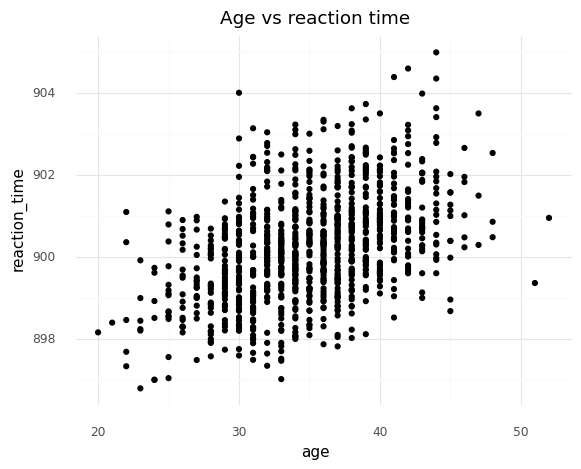

<ggplot: (8757800642065)>

In [ ]:
(ggplot(df, aes(x = "age", y = "reaction_time")) + geom_point() + theme_minimal()+ labs(title = "Age vs reaction time"))

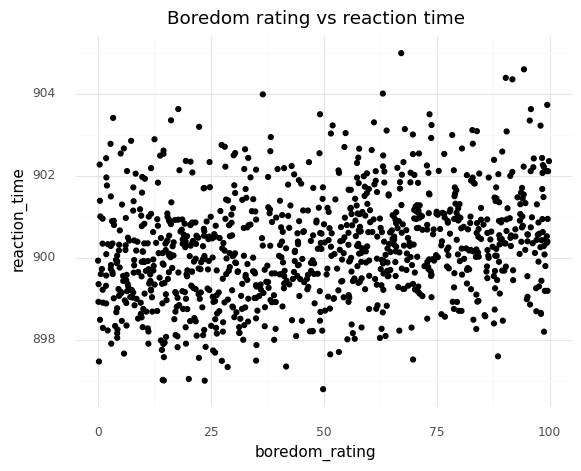

<ggplot: (8757800577073)>

In [ ]:
(ggplot(df, aes(x = "boredom_rating", y = "reaction_time")) + geom_point()+ theme_minimal()+ labs(title = "Boredom rating vs reaction time"))

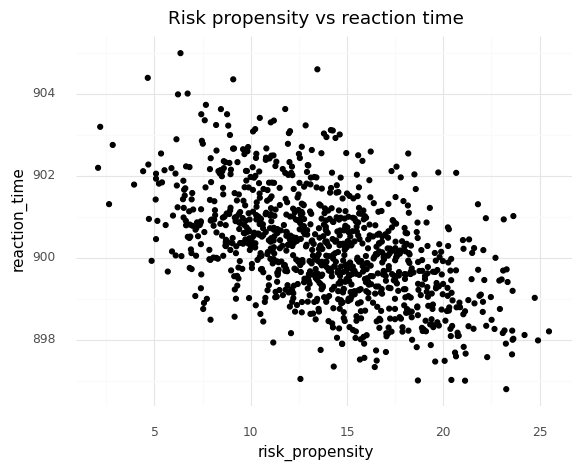

<ggplot: (8757800670621)>

In [ ]:
(ggplot(df, aes(x = "risk_propensity", y = "reaction_time")) + geom_point()+ theme_minimal()+ labs(title = "Risk propensity vs reaction time"))

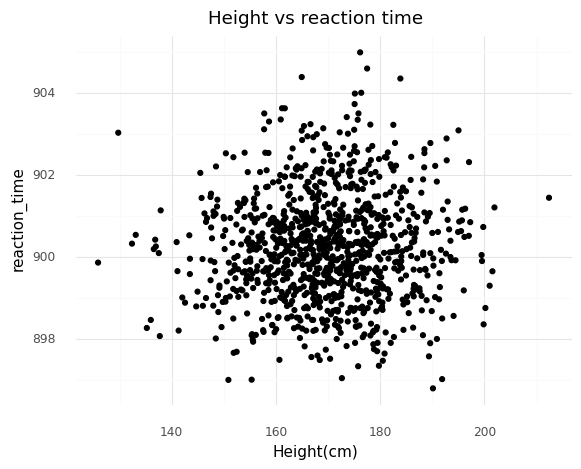

<ggplot: (8757800586797)>

In [ ]:
(ggplot(df, aes(x = "height", y = "reaction_time")) + geom_point()+ theme_minimal()+ labs(title = "Height vs reaction time", x = "Height(cm)"))

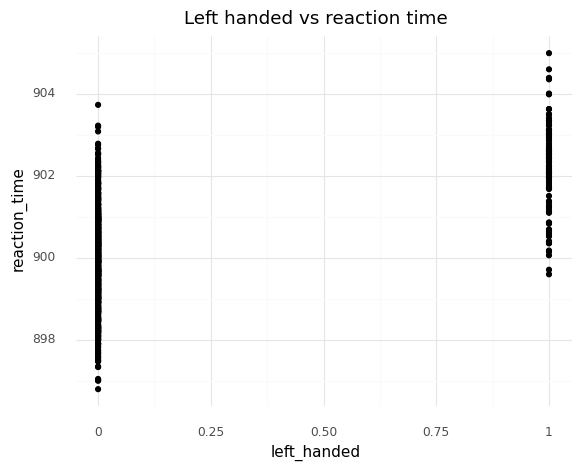

<ggplot: (8757800489033)>

In [ ]:
(ggplot(df, aes(x = "left_handed", y = "reaction_time")) + geom_point()+ theme_minimal()+ labs(title = "Left handed vs reaction time"))

In [ ]:
#fitting our model and making predictions
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_on_train = lr.predict(X_train)
y_pred_on_test = lr.predict(X_test)

# Residual plot to check linearity:





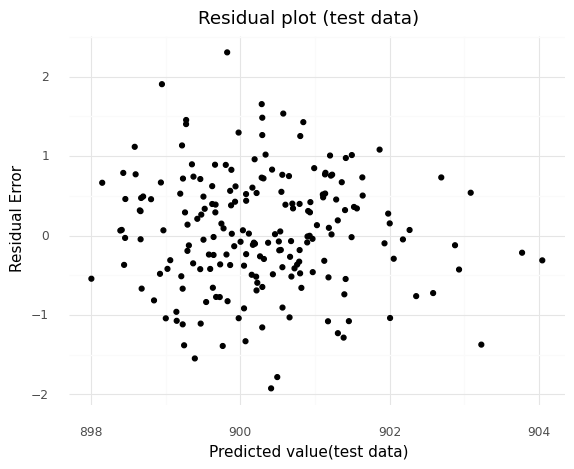

<ggplot: (8757800472289)>

In [ ]:
assump = pd.DataFrame({"Predicted":y_pred_on_test,
                      "Residual Error": y_pred_on_test - y_test})
(ggplot(assump,aes(x = "Predicted", y = "Residual Error"))+ geom_point()+ labs(title = "Residual plot (test data)", x = "Predicted value(test data)")+ theme_minimal())

## Our graphs shown above proves that we are not violating the assumption of linearity. There appears to be a linear relationship between all of our predictor variables with the exception of left_handed, boredom_rating, and height

#C) check the assumption of homoscedasticity by plotting predicted reaction times and residuals using ggplot (using the training set).

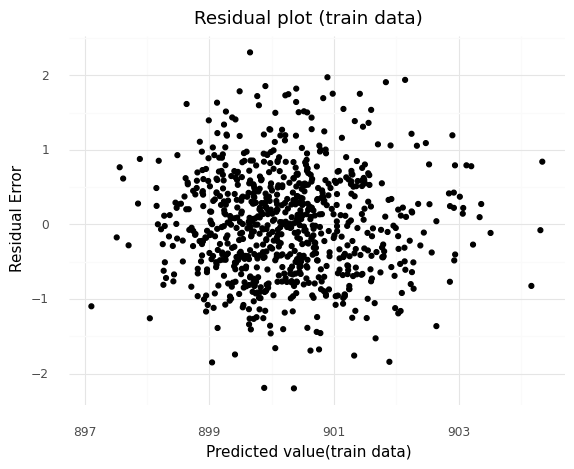

<ggplot: (8757800413981)>

In [ ]:
assump_2 = pd.DataFrame({"Residual Error": y_pred_on_train - y_train,
                     "predicted": y_pred_on_train})
(ggplot(assump_2,aes(x = "predicted", y = "Residual Error"))+ geom_point()+ labs(title = "Residual plot (train data)", x = "Predicted value(train data)") +theme_minimal())

## After plotting the residuals containing the predicted values for the training set and the actual values of the training set, we see that our dataset is homoskedastic because the residual errors are evenly distributed among the dataset. As seen in the graph above, the residual errors are approximately evenly spread between 2 to -2.

# D) Plot the actual vs. predicted reaction times (for both train an test set separately), as well as print out the mean <em>absolute</em> error for both <em>train</em> and <em>test</em> and $R^2$ for your model for both <em>train</em> and <em>test</em>. <strong>Discuss</strong> how well your model did based on these metrics, and how can you tell.

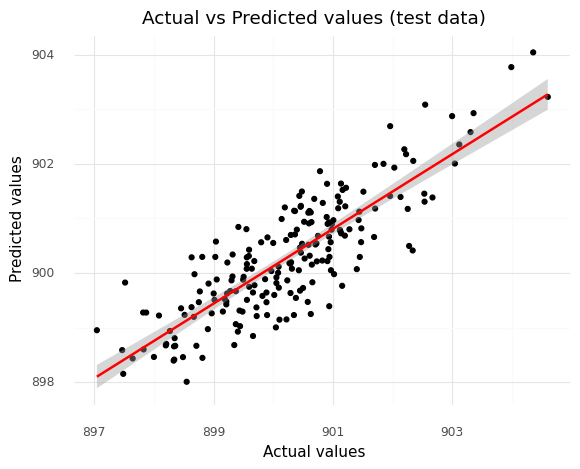

<ggplot: (8757800415213)>

In [ ]:
predictions_test_df = pd.DataFrame({"Actual values": y_test,
                               "Predicted values": y_pred_on_test})
(ggplot(predictions_test_df, aes(x = "Actual values", y = "Predicted values"))+ labs(title ="Actual vs Predicted values (test data)") + geom_point(color = "black")+theme_minimal()+geom_smooth(method = "lm", color = "red"))

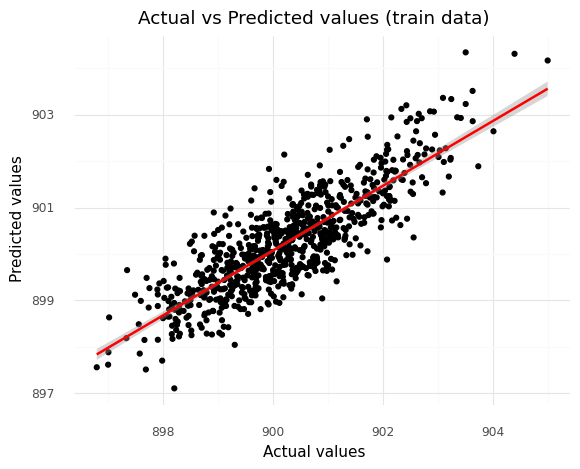

<ggplot: (8757798282445)>

In [ ]:
predictions_train_df = pd.DataFrame({"Actual values": y_train,
                               "Predicted values": y_pred_on_train})
(ggplot(predictions_train_df, aes(x = "Actual values", y = "Predicted values"))+ labs(title ="Actual vs Predicted values (train data)") + geom_point(color = "black")+theme_minimal()+geom_smooth(method = "lm", color = "red"))

In [ ]:
mae_train = mean_absolute_error(y_train, y_pred_on_train)
mae_test = mean_absolute_error(y_test, y_pred_on_test)
r2_train = r2_score(y_train, y_pred_on_train)
r2_test = r2_score(y_test, y_pred_on_test)
print("MAE train:", mae_train)
print("MAE test:", mae_test)
print("R2 train:", r2_train)
print("R2 test:", r2_test)

MAE train: 0.568953337687866
MAE test: 0.5831113411612864
R2 train: 0.6979795106942799
R2 test: 0.7048711526537743


## Based on the mean absolute error scores printed above, the linear regression model did not perform very well with respect to the $r^2$ scores. Because we only have an $r^2$ value of $~0.698$ for the training set and an $r^2$ value of $~0.705$ for our test set, we cannot say our model is very accurate. In terms of mean absolute error, our model performed well with a mae of $0.569$ for the training set and $0.583$ for the test set. Our mean absolute error indicates that with our linear regression model we are able to predict the reaction time of a certain individual with an estimated absolute error between 0.569 and 0.583 seconds.

# E) is your model overfit? Discuss in detail how you can tell:
## Overfitting (basic definition): Significant difference of error between training set and test set. More error in test set, less in training set.


In [ ]:
mae_train = mean_absolute_error(y_train, y_pred_on_train)
mae_test = mean_absolute_error(y_test, y_pred_on_test)
r2_train = r2_score(y_train, y_pred_on_train)
r2_test = r2_score(y_test, y_pred_on_test)
print("MAE train:", mae_train)
print("MAE test:", mae_test)
print("R2 train:", r2_train)
print("R2 test:", r2_test)


MAE train: 0.568953337687866
MAE test: 0.5831113411612864
R2 train: 0.6979795106942799
R2 test: 0.7048711526537743


## After plotting residual plots and calculating the respective mean absolute errors and $r^2$ scores for the training and test sets, there is no significant difference between the accuracies of the training and test set. With respect to mean absolute error, there is a difference of 0.02 seconds of reaction time between the training set and the test set which allows me to conclude that the model is not overfitted.

#F) use ggplot to make a bar chart showing the coefficient values (x should be each coef name, the height of each bar should be the value of the coefficient). DO NOT include the intercept in this plot. Briefly discuss the impact of each variable on reaction time.

In [ ]:
coefficients = pd.DataFrame({"Coef": lr.coef_,
                             "Name": predictors})
coefficients = coefficients.append({"Coef": lr.intercept_,
                          "Name": "intercept"}, ignore_index = True)

coefficients

,Coef,Name
0,0.526745,age
1,0.296864,boredom_rating
2,-0.607662,risk_propensity
3,0.026834,height
4,1.903498,left_handed
5,900.049041,intercept


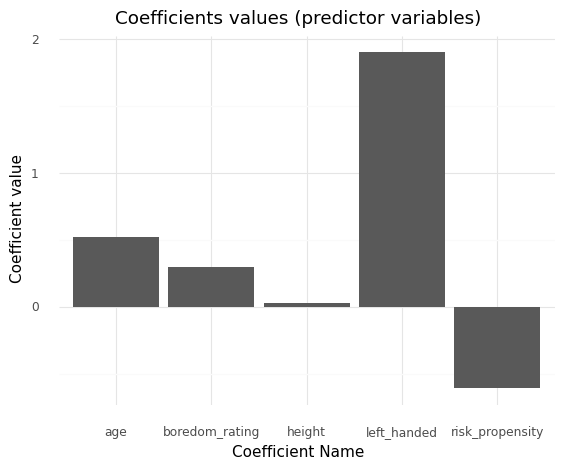

<ggplot: (8757798226397)>

In [ ]:
coefficients = pd.DataFrame({"Coef": lr.coef_,
                             "Name": predictors})
(ggplot(coefficients, aes(x = "Name", y = "Coef")) + geom_bar(stat = "identity") +theme_minimal() + labs(title = "Coefficients values (predictor variables)", x = "Coefficient Name", y = "Coefficient value"))



# import matplotlib.pyplot as plt
# plt.bar(coefficients.Name, coefficients.Coef)
# plt.title("Coefficients")
# plt.xlabel("Coefficient Name")
# plt.ylabel("Coefficient Value")
# plt.show()

# Description of the impact of each predictor(x variable) on the predicted outcome(y variable)
### For every 0.527 increase in age, we predict that reaction time will increase by 1 ms(milliseconds)
### For every 0.297 increase in boredom rating, we predict that reaction time will increase by 1 ms
### For every -0.608 decrease in risk_propensity, we predict that reaction time will increase by 1 ms.
### For every 0.027 increase in height, we predict that reaction time will increase by 1 ms.
### For every 1.9 increase in left handed observations, we predict that reaction time will increase by 1 ms.
### In conclusion, risk left_handed, risk_propensity, and age have the biggest impact on reaction time in our linear regression model.

In [ ]:
# doesn't show this cells output when downloading PDF
!pip install gwpy &> /dev/null

# installing necessary files
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

# installing pypandoc
!pip install pypandoc

# connecting your google drive
from google.colab import drive
drive.mount('/content/drive')

# copying your file over. Change "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!cp "drive/My Drive/Colab Notebooks/HW1.ipynb" ./

# Again, replace "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!jupyter nbconvert --to PDF "Class6-Completed.ipynb"